<a href="https://colab.research.google.com/github/JefteLG/Twitter_Sentiment_Analysis/blob/main/Notebooks/2_Solucao_Melhorada/IFTO_twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong>Twitter Sentiment Analysis<strong><h1></center>

- O objetivo desse estudo de caso é criar um modelo que analisa um ou mais Tweets para prever o sentimento(Positivo ou Negativo) presente em cada Tweet. É usado o Processamento de linguagem natural(NLP) juntamente com aprendizagem de maquina para construir esse modelo.

- Essa notebook foi criado com o objetivo de melhorar o resultado da solução inicial criada em outro notebook.

 - [Repositorio no GitHub](https://github.com/JefteLG/Twitter_Sentiment_Analysis)



# Testes

In [ ]:
luska = 'quero @user remover o @user agora'

In [ ]:
newtext = [word for word in luska.split()]


In [ ]:
#Baixar os dados
!wget --no-check-certificate \
    https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/twitter.csv \
    -O /tmp/twitter.csv

--2021-01-22 22:37:09--  https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘/tmp/twitter.csv’

/tmp/twitter.csv    100%[===================>]   2.96M  12.7MB/s    in 0.2s    

2021-01-22 22:37:09 (12.7 MB/s) - ‘/tmp/twitter.csv’ saved [3103165/3103165]



In [ ]:
tweets_df = pd.read_csv('/tmp/twitter.csv')
tweets_df

In [ ]:
tweet = tweets_df[tweets_df['id']==4]['tweet'].iloc[0]
tweet

In [ ]:
!pip install demoji
import demoji as em

em.download_codes()

In [ ]:
text = 'Olá 😀'

em.findall(text)

In [ ]:
from pprint import pprint
seq = "I bet you didn't know that 😀, 🙋‍♂️, and 🙋‍♀️ are three different emojis."
pprint(seq.encode('unicode-escape'))

**TESTE2**

In [ ]:
import re
import string

text1="O Zyoo não é o 'melhor' do mundo"
text2='Eu não gosto de "jogar" futebol'

limpar_aspas_simples="'"
limpar_aspas_duplas='"'

textfim1 = re.sub(limpar_aspas_simples,' ', text1)
textfim2 = re.sub(limpar_aspas_duplas,' ', text2)

print(textfim1)
print(textfim2)



O Zyoo não é o  melhor  do mundo
Eu não gosto de  jogar  futebol


**TESTE3**

In [ ]:
compare_list = "FB needs to hurry up and add a laugh/cry button 😬😭😓🤢🙄😱 Since eating my feelings has not fixed the world's problems."

from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
# match_tokens = [sent for sent in compare_list]
match_tokens = []

for sent in compare_list:   
    match_tokens.append(match_tokenizer.tokenize(sent))

print(match_tokens)

[['F'], ['B'], [], ['n'], ['e'], ['e'], ['d'], ['s'], [], ['t'], ['o'], [], ['h'], ['u'], ['r'], ['r'], ['y'], [], ['u'], ['p'], [], ['a'], ['n'], ['d'], [], ['a'], ['d'], ['d'], [], ['a'], [], ['l'], ['a'], ['u'], ['g'], ['h'], [], ['c'], ['r'], ['y'], [], ['b'], ['u'], ['t'], ['t'], ['o'], ['n'], [], [], [], [], [], [], [], [], ['S'], ['i'], ['n'], ['c'], ['e'], [], ['e'], ['a'], ['t'], ['i'], ['n'], ['g'], [], ['m'], ['y'], [], ['f'], ['e'], ['e'], ['l'], ['i'], ['n'], ['g'], ['s'], [], ['h'], ['a'], ['s'], [], ['n'], ['o'], ['t'], [], ['f'], ['i'], ['x'], ['e'], ['d'], [], ['t'], ['h'], ['e'], [], ['w'], ['o'], ['r'], ['l'], ['d'], ["'"], ['s'], [], ['p'], ['r'], ['o'], ['b'], ['l'], ['e'], ['m'], ['s'], []]


# Estrutura do Projeto
O projeto prático de Análise de sentimento do Twitter é dividido nas seguintes tarefas:

- Tarefa nº 1: Entender a Declaração do Problema e o caso de negócios.
- Tarefa nº 2: Importar bibliotecas e conjuntos de dados.
- Tarefa nº 3: Executar a análise exploratória de dados.
- Tarefa nº 4: Plotar a nuvem de palavras.
- Tarefa nº 5: Executar vetorização de contagem (Tokenization).
- Tarefa nº 6: Treinar um Classificador Naive Bayes.
- Tarefa nº 7: Avaliar o desempenho do modelo treinado.
- Tarefa nº 8: Salvar o modelo treinado.

## Tarefa nº 1: Entender a Declaração do Problema e o caso de negócios

- Nesse notebook é usado o Processamento de linguagem natural(NLP) juntamente com aprendizagem de maquina para construir um modelo que analisa milhares de Tweets para prever o sentimentos das pessoas.

- A Inteligencia artificial e a analise de sentimentos baseadas em aprendizado de maquina é crucial para empresas, visto que, os insight revelado pela analise visa indicar o grau de qualidade dos serviços e/ou produtos da empresa de acordo com os clientes.(Trabalhos Futuros)

- Esse projeto é diretamente aplicavél a praticamente qualquer empresa que disponhe de meios onlines(Twitter, Instagran, Facebook, WebSite) para interagir com seus clientes.(Trabalhos Futuros)

- Os algoritmos podem ser usados para detectar e possivelmente sinalizar autamaticamente tweets de odio e racismo.(Trabalhos Futuros)

## Tarefa nº 2: Importar bibliotecas e conjuntos de dados

In [ ]:
#Pacotes essenciais para analise numericas, manipulação de data frames e visualização de dados.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Pacote para a criação de nuuvens de palavras na tarefa nº 4
!pip install WordCloud
from wordcloud import WordCloud

In [ ]:
# A base de dados desse exemplo está no meu repositorio do github e pode ser baixada no link abaixo.
!wget --no-check-certificate \
    https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/data_base_criada/v3.0/total_geral.csv \
    -O /tmp/dataframe_tweets.csv

In [ ]:
# Utilizando o pandas para ler o arquivo CSV e estrutura-lo em um data frame na variavel `tweets_df` por meio do metodo read_csv().
tweets_df_dataframe = pd.read_csv('/tmp/dataframe_tweets.csv')

In [ ]:
# visualização2
tweets_df_dataframe

In [ ]:
# visualização1.
tweets_df_dataframe.head()

In [ ]:
# Informações sobre a quantidade de Tweets, memoria, tipo de dados e dados faltantes.
tweets_df_dataframe.info()

In [ ]:
# Exclusão da coluna `id`, não é um dado relevante para o modelo.
# tweets_df = tweets_df.drop(columns=['id'], axis=1)

## Tarefa nº 3: Executar a análise exploratória de dados.

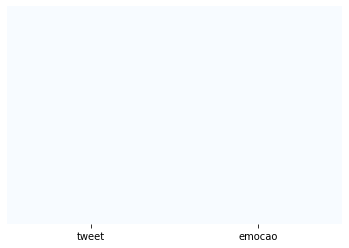

In [ ]:
# Esta é uma função no nível dos eixos e desenhará o mapa de calor para os eixos ativos no momento. Nesse caso a função verifica se existe dados faltantes.
sns.heatmap(tweets_df_dataframe.isnull(), yticklabels=False, cbar=False, cmap="Blues")

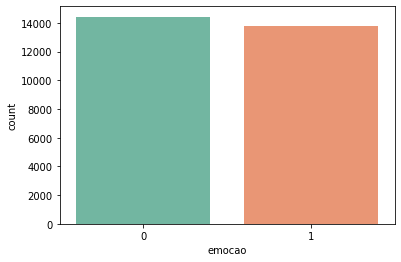

In [ ]:
# O método sns.countplot() é usado para mostrar as contagens de observações em cada categoria categórica usando barras(Histograma).
sns.countplot(data=tweets_df_dataframe, x='emocao', palette='Set2')
plt.show()

# sns.countplot(tweets_df_dataframe['emocao'], label='Count', palette='Set2')
# plt.show()

In [ ]:
# Nova coluna com o tamanho dos tweets
# tweets_df_dataframe['length'] = tweets_df_dataframe['tweet'].apply(len)

**Teste**

In [ ]:
# from nltk.tokenize import TweetTokenizer

In [ ]:
# tweets_df_dataframe[568]

In [ ]:
# tweetTK = TweetTokenizer()

In [ ]:
# tweetTK.tokenize(tweets_df_dataframe[tweets_df['id']==31958]['tweet'].iloc[0])

**Fim Teste**

In [ ]:
# Descobrir o tamanho maximo, minimo e medio dos tweets.
# tweets_df_dataframe['length'].plot(bins=100, kind='hist', figsize=(12,8), color='g')

# tweets_df_dataframe.describe()

In [ ]:
# Selecionar a menor frase
# tweets_df_dataframe[tweets_df['length']==11]['tweet'].iloc[0]

In [ ]:
# Separa o DataFrame em dois Dataframes, um com sentimentos positivos e o outro com sentimentos negativos.
positive_df = tweets_df_dataframe[tweets_df_dataframe['emocao']==1]
negative_df = tweets_df_dataframe[tweets_df_dataframe['emocao']==0]

In [ ]:
positive_df

In [ ]:
negative_df

## Tarefa nº 4: Plotar a nuvem de palavras

**Sem a remoção de stop word**

In [ ]:
# Criar uma lista de tweets
sentences = tweets_df_dataframe['tweet'].tolist()

In [ ]:
# O método join() pega todos os itens em um iterável e os une em uma string. é usado o espaço como separador
sentences_as_one_string = " ".join(sentences)

In [ ]:
# Nuvem de palavras de todos os tweets
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
# Nuvem de palavras de todos os tweets NEGATIVOS
negative_sentences = negative_df['tweet'].tolist()
negative_as_one_string = " ".join(negative_sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_as_one_string))

In [ ]:
# Nuvem de palavras de todos os tweets POSITIVOS
positive_sentences = positive_df['tweet'].tolist()
positive_as_one_string = " ".join(positive_sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_as_one_string))

## Tarefa nº 5: Executar vetorização de contagem(Tokenization)

### 5.1 Entendendo o a metodologia para tokenizar as palavras das frases

Aprofundar:

[Feature Extraction from Text (USING PYTHON)](https://www.youtube.com/watch?v=7YacOe4XwhY&ab_channel=MachineLearningTV)

[Feature Extraction in Scikit Learn](https://www.youtube.com/watch?v=y_X4hXjTFNQ&ab_channel=DataTalks)

[NLP - Text Preprocessing and Text Classification (using Python)](https://www.youtube.com/watch?v=nxhCyeRR75Q&ab_channel=MachineLearningTV)

**Metodologia: Bag of Word**

In [ ]:
#Classe responsavel por Converter uma coleção de documentos de texto em uma matriz de contagens de tokens
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data=[
             'Porcaria de produto',
             'Obrigado pelo retorno estou muito satisfeito com seu trabalho?',
             'Voces ainda vão me responder?',
             'O pior serviço de atendimento de todos!!!'
             ]

sample_data2=[
              'Hello World',
              'Hello Hello hello World',
              'Hello World world world'
              ]

In [ ]:
# Aprender o vocabulario do texto e retornar um array, [n_samples, n_features]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

In [ ]:
# versao tokenizada das strings no dataset
# (id palavra, id frase)  frequencia da palavra na frase 
c = X
print(c)

In [ ]:
print(vectorizer.vocabulary_)

In [ ]:
#Retorne uma representação densa desta matriz.
print(X.toarray())

### 5.2 Tokenizando as palavras das frases

In [ ]:
import pandas as pd
import string as st
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# dataset
!wget --no-check-certificate \
    https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/data_base_criada/v3.0/total_geral.csv \
    -O /tmp/dataframe_tweets.csv

In [ ]:
# ler os dados
tweets_df_dataframe = pd.read_csv('/tmp/dataframe_tweets.csv')

In [ ]:
#Realiza a Tokenização dos tweets utilizando a limpeza de mensagens primeiro
vectorizer = CountVectorizer(dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets_df_dataframe['tweet'])

In [ ]:
# conjunto de tweets vetorizados em um array de presença e frequencia de palavras em uma frase
X = tweets_countvectorizer

In [ ]:
# conjunto de rotulos binarios para classificar a emoção(positivo, negetiva) para cada elemento do meu conjunto X
y = tweets_df_dataframe['emocao']

## Tarefa nº 6: Treinar um Classificador Naive Bayes

In [ ]:
X.shape

(28190, 29215)

In [ ]:
y.shape

(28190,)

In [ ]:
# X

In [ ]:
# Separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# # print(X_train)
# ht = X_train.toarray()
# print(ht[25568][41680])

In [ ]:
# print(X_train.shape)

In [ ]:
# print(X_test.shape)

In [ ]:
# print(y_train.shape)

In [ ]:
# print(y_test.shape)

In [ ]:
# Utilização do algoritmo de Naive Bayes para o treinamento
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Tarefa nº 7: Avaliar o desempenho do modelo treinado

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# visualização da matriz de confusão
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
cm
# sns.heatmap(cm, annot=True)

array([[2779,   73],
       [ 201, 2585]])

In [ ]:
# metricas
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2852
           1       0.97      0.93      0.95      2786

    accuracy                           0.95      5638
   macro avg       0.95      0.95      0.95      5638
weighted avg       0.95      0.95      0.95      5638



**TESTES**

In [ ]:
# QTD de classificações certas
tweet_correto = (y_test == NB_classifier.predict(X_test)).sum()
print(f'{tweet_correto} classificações certas')

5364 classificações certas


In [ ]:
# QTD de classificações incorretas
tweet_incorreto = (y_test.size - tweet_correto)
print(f'{tweet_incorreto} classificações incorretas')

274 classificações incorretas


In [ ]:
# Porcentagem de acuraccy
error = tweet_incorreto/(tweet_correto + tweet_incorreto)
print(f'acuraccy do modelo {1-error:.2%}')

acuraccy do modelo 95.14%


In [ ]:
# acuraccy
NB_classifier.score(X_test, y_test)

0.9547711954593827

**Exemplos**

In [ ]:
exemplos = [
      'O meu dia hoje foi pessimo',
      'Minha cabeça está doendo muito',
      'Eu acho que me dei muito mal na minha entrevista de emprego hoje',
      'acordei feliz mas meu dia acabou muito triste',
      'eu quero morrer',
      'vou matar o',
      'acordei mó triste mas meu dia acabou muito feliz',
      'estou bastante otimista hoje',
      'Vou ter um irmãozinhoooooo eba',
      'Vou ser mamãe, estou muito contente',
      'Me desejem sorte',
      'o é meu melhor amigo',
      'fiquei na bad',
      'estou hypado',
      'estou no hype'
      ]

exemplos2 = [
            'Gosto de um bom churrasco'
]

16 - 100
14 - X

In [ ]:
# Tokenizar os exemplos
exemplos = vectorizer.transform(exemplos)

In [ ]:
# Tokenizar os exemplos
exemplos2 = vectorizer.transform(exemplos2)

In [ ]:
print(exemplos.toarray())

In [ ]:
t = exemplos.toarray()
print(t[0][10:40])

In [ ]:
# classificar o sentimento dos exemplos
NB_classifier.predict(exemplos)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
# classificar o sentimento dos exemplos
NB_classifier.predict(exemplos)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

### **TESTE 1**

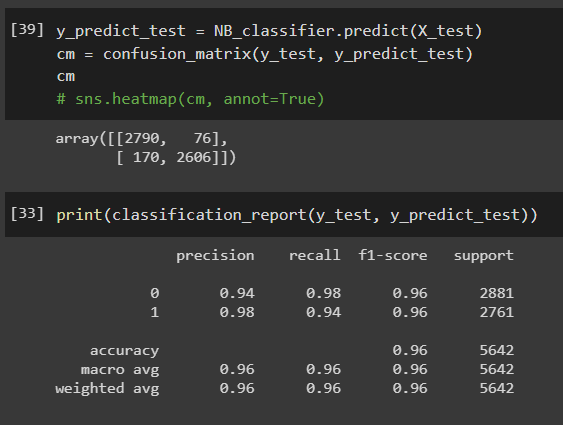

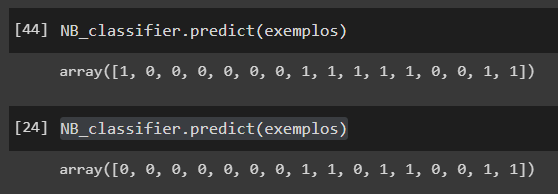

### **TESTE 2**

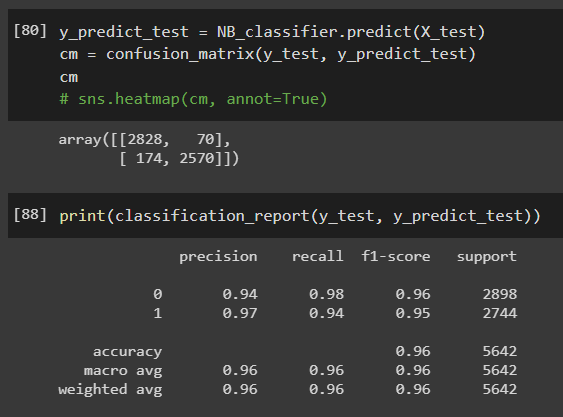

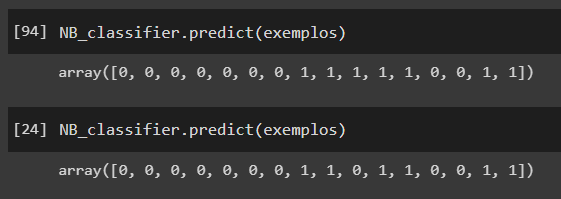

## Tarefa nº 8: Salvar o modelo treinado

referencia:

- [Exportar um estimador scikit-learn](https://cloud.google.com/ai-platform/prediction/docs/exporting-for-prediction#pickle_1)

- [Salvando modelos de machine learning com Pickle](https://sigmoidal.ai/como-salvar-seu-modelo-de-machine-learning/)

In [ ]:
import pickle
 
# salvar o modelo Naive Bayes (NB_classifier) no arquivo model_1.pkl
with open('/tmp/model_2.pkl', 'wb') as file:
    pickle.dump(NB_classifier, file)

In [ ]:
# Carregar modelo
with open('/tmp/model_1.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
# classificar o sentimento
model.predict(exemplos2)

array([1])